Data.gov
Source: https://catalog.data.gov/dataset/consumer-complaint-database#topic=consumer_navigation

# Purpose of analysis: 
### Determine which products consumers complain about the most, according to the Bureau of Consumer Financial Protection.

### Project type: Data cleaning & investigation

In [445]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


In [446]:
def print_full(x):
    """See all rows of a data frame without permanently resetting maximum displayed rows."""
    pd.set_option('display.max_rows', len(x)) 
    print(x)
    pd.reset_option('display.max_rows')

In [447]:
complaints = pd.read_csv('Consumer_Complaints.csv')

In [448]:
print(f'Number of complaints: {len(complaints)}')
complaints.head()

Number of complaints: 1608094


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-09-24,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,transworld systems inc. \nis trying to collect...,NaN,TRANSWORLD SYSTEMS INC,FL,335XX,NaN,Consent provided,Web,2019-09-24,Closed with explanation,Yes,NaN,3384392
1,2019-09-19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,PA,15206,NaN,Consent not provided,Web,2019-09-20,Closed with non-monetary relief,Yes,NaN,3379500
2,2019-10-25,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,I would like to request the suppression of the...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,937XX,NaN,Consent provided,Web,2019-10-25,Closed with explanation,Yes,NaN,3417821
3,2019-11-08,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,"Over the past 2 weeks, I have been receiving e...",NaN,"Diversified Consultants, Inc.",NC,275XX,NaN,Consent provided,Web,2019-11-08,Closed with explanation,Yes,NaN,3433198
4,2019-02-08,Vehicle loan or lease,Lease,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,HYUNDAI CAPITAL AMERICA,FL,33161,NaN,Consent not provided,Web,2019-02-08,Closed with non-monetary relief,Yes,NaN,3146310


## Clean Data (A):
* Drop unnecessary columns. This analysis will focus on product/sub-products that received the most complaints,and the issue/sub-issue related to those products.
* Rename columns for ease of use.
* Convert dates to date_time type.

[To Do:] Check for null values

In [449]:
unnecessary_cols = ['Consumer complaint narrative', 'Company public response', 'Tags', 'Consumer consent provided?',
                    'Submitted via', 'Date sent to company', 'Timely response?', 'Complaint ID']

complaints.drop(unnecessary_cols, axis = 1, inplace = True)

In [450]:
complaints.rename(columns={
    'Date received': 'date_received', 
    'Product': 'product',
    'Sub-product': 'sub_product',
    'Issue': 'issue',
    'Sub-issue': 'sub_issue',
    'Company': 'company',
    'State': 'state',
    'ZIP code': 'zip',
    'Company response to consumer': 'comp_response_to_consumer',
    'Consumer disputed?': 'disputed'
}, inplace=True)


In [451]:
complaints['date_received']=pd.to_datetime(complaints['date_received'], format='%m/%d/%Y', errors='ignore') 

## Investigate Data (1)
* Review column names and object types (all 'object' are strings, and therefore could require additional cleaning).
* **TO DO: REVIEW PANDAS OBJECTS BEFORE FINALIZING THIS MARKDOWN**
* Identify number of products (18) and subproducts (77).
* Identify most complained about products and subproducts.


In [452]:
print(f'{complaints.info()} \n\n{complaints.dtypes}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608094 entries, 0 to 1608093
Data columns (total 10 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   date_received              1608094 non-null  object
 1   product                    1608094 non-null  object
 2   sub_product                1372929 non-null  object
 3   issue                      1608094 non-null  object
 4   sub_issue                  1038872 non-null  object
 5   company                    1608094 non-null  object
 6   state                      1580829 non-null  object
 7   zip                        1454926 non-null  object
 8   comp_response_to_consumer  1608093 non-null  object
 9   disputed                   768477 non-null   object
dtypes: object(10)
memory usage: 122.7+ MB
None 

date_received                object
product                      object
sub_product                  object
issue                        object
sub_issue

In [453]:
"""Check total number of products and sub-products."""
unique_product_complaints = complaints['product'].unique()
unique_subproduct_complaints = complaints['sub_product'].unique()

print(f'Total Product Complaints: {len(unique_product_complaints)}')
print(f'Total Sub-product Complaints: {len(unique_subproduct_complaints)}')

Total Product Complaints: 18
Total Sub-product Complaints: 77


Credit reporting, credit repair services, or other personal consumer reports    402936
Mortgage                                                                        302157
Debt collection                                                                 294389
Credit reporting                                                                140432
Credit card                                                                      89190
Bank account or service                                                          86206
Credit card or prepaid card                                                      77130
Checking or savings account                                                      63747
Student loan                                                                     58024
Consumer Loan                                                                    31604
Vehicle loan or lease                                                            17264
Money transfer, virtual currency, or money 

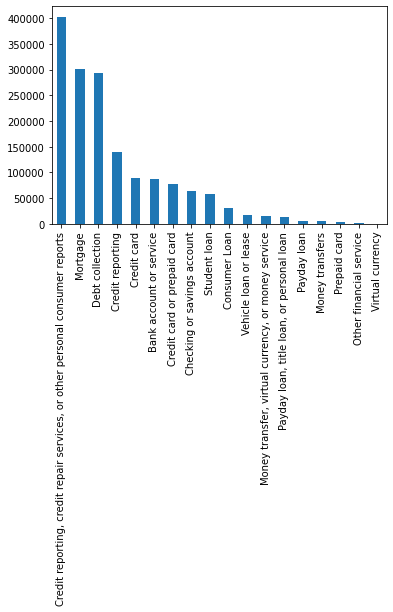

In [454]:
"""Display products sorted by # of complaints."""
product_value_counts = complaints['product'].value_counts()

print(f'{product_value_counts} \n')
product_value_counts.plot(kind='bar') 

In [455]:
"""Review all sub-products
Recall: print_full defined above, to display all rows 
"""

print_full(product_value_counts)

Credit reporting, credit repair services, or other personal consumer reports    402936
Mortgage                                                                        302157
Debt collection                                                                 294389
Credit reporting                                                                140432
Credit card                                                                      89190
Bank account or service                                                          86206
Credit card or prepaid card                                                      77130
Checking or savings account                                                      63747
Student loan                                                                     58024
Consumer Loan                                                                    31604
Vehicle loan or lease                                                            17264
Money transfer, virtual currency, or money 

In [456]:
"""Check which products the 'I do not know' sub_product is most found in"""

idk_bool = complaints['sub_product'] == 'I do not know' # Bool for all sub_products with "I do not know" as answer
print( complaints['product'][idk_bool].value_counts() )

"""Check what other sub_products exist within the 'Debt collection' product"""
print( complaints['sub_product'][complaints['product'] == 'Debt collection'].value_counts())

Debt collection    61502
Name: product, dtype: int64
I do not know                            61502
Other (i.e. phone, health club, etc.)    44543
Other debt                               43890
Credit card debt                         31739
Credit card                              28698
Medical debt                             23858
Medical                                  21187
Payday loan                               7562
Auto debt                                 4829
Mortgage                                  4809
Payday loan debt                          4559
Auto                                      3755
Mortgage debt                             3343
Non-federal student loan                  2881
Federal student loan debt                 2499
Federal student loan                      2475
Private student loan debt                 2260
Name: sub_product, dtype: int64


In [457]:
"""Check in which product categories the sub_product 'Other (i.e. phone, health club, etc.) exists.
Result: only in 'Debt collection'
"""

complaints[complaints['sub_product'] == 'Other (i.e. phone, health club, etc.)']['product'].value_counts()

Debt collection    44543
Name: product, dtype: int64

## Observations:
* "I do not know" is the 5th most answered sub-product. All of these are part of the "debt collection" product.
* There are two 'other' subproducts within the 'Debt collection' product. 


Three other product categories have overlaps that must be re-sorted:
* Credit card / credit card or prepaid card / prepaid card
* Money transfers / money transfer, virtual currency, or money service / virtual currency
* Payday loan / payday loan, title loan, orpersonal loan / consumer loan

## Clean Data (B):
* Rename and consolidate 'I do not know' and 'Other (i.e.phone, health club, etc.)' sub_product into 'Other debt' within
    the 'Debt collection' product.

In [458]:
complaints['sub_product'] = complaints['sub_product'].str.replace(
    'I do not know', 
    'Other debt'
)
complaints['sub_product'] = complaints['sub_product'].str.replace(
    'Other (i.e. phone, health club, etc.)', 
    'Other debt', 
    regex = False
) 

"""str.replace(regex = False) treats the string being replaced as a literal rather than a regex expression. 
Necessary to parse the parantheses in 'Other (i.e. phone, health club, etc.)', which would otherwise be
treated as capture groups.
see: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.replace.html 
"""

# Confirm subproducts have been renamed in 'Debt collection product'
print_full(complaints[complaints['product'] == 'Debt collection']['sub_product'].value_counts())

Other debt                   149935
Credit card debt              31739
Credit card                   28698
Medical debt                  23858
Medical                       21187
Payday loan                    7562
Auto debt                      4829
Mortgage                       4809
Payday loan debt               4559
Auto                           3755
Mortgage debt                  3343
Non-federal student loan       2881
Federal student loan debt      2499
Federal student loan           2475
Private student loan debt      2260
Name: sub_product, dtype: int64


In [459]:
# [SHOULD THIS GO SOMEWHERE ELSE?]
complaints.loc[complaints['product'] == 'Consumer Loan'] = 'Consumer loan' # for consistency's sake

## Clean Data (C):
Rename & resort product categories for overlapping/redundant sub-category names 

1) Credit cards / prepaid cards / credit or prepaid cards

2) Money transfer / Virtual currency / Money transfer, virtual currency, or money service sub_products

3) Payday loan / consumer loan / Payday loan, title loan, or personal loan                                        


### Investigate product groups that have overlapping sub_product gruops:
1. Credit card or prepaid card / credit card / prepaid card
2. Money transfer, virtual currency, or money service / Money transfer / Virtual currency 
3. Payday, title or personal loan / Payday loan / consumer loan 


In [460]:
"""1. Credit card or prepaid card / credit card / prepaid card"""

credit_or_prepaid_card_bool = complaints['product'] == 'Credit card or prepaid card'
credit_card_bool = complaints['product'] == 'Credit card'
prepaid_card_bool = complaints['product'] == 'Prepaid card'

credit_or_prepaid_cards = complaints[credit_or_prepaid_card_bool]
credit_cards = complaints[credit_card_bool]
prepaid_cards = complaints[prepaid_card_bool]

credit_or_prepaid_cards_subproducts = credit_or_prepaid_cards['sub_product']
credit_subproducts = credit_cards['sub_product']
prepaid_cards_subproducts = prepaid_cards['sub_product']

print(
    f'Credit or prepaid card sub_products: \n{credit_or_prepaid_cards_subproducts.value_counts()} \n\n'
    f'Credit cards sub_products: \n{credit_subproducts.value_counts()} \n\n'
    f'Prepaid cards sub_products: \n{prepaid_cards_subproducts.value_counts()} \n\n'
)

Credit or prepaid card sub_products: 
General-purpose credit card or charge card    59312
Store credit card                             12501
General-purpose prepaid card                   2959
Government benefit card                        1728
Payroll card                                    331
Gift card                                       292
Student prepaid card                              7
Name: sub_product, dtype: int64 

Credit cards sub_products: 
Series([], Name: sub_product, dtype: int64) 

Prepaid cards sub_products: 
General purpose card                      1752
Mobile wallet                              418
Payroll card                               411
Gift or merchant card                      402
Government benefit payment card            389
ID prepaid card                            207
Other special purpose card                 191
Transit card                                37
Electronic Benefit Transfer / EBT card      12
Name: sub_product, dtype: int64 




In [461]:
"""2. Money transfer, virtual currency, or money service / Money transfer / Virtual currency"""

moneytransfer_virtualcurency_moneyservice_bool = complaints['product'] == 'Money transfer, virtual currency, or money service'
moneytransfer_bool = complaints['product'] == 'Money transfer'
virtualcurrency_bool = complaints['product'] == 'Virtual currency'

moneytransfer_virtualcurency_moneyservice = complaints[moneytransfer_virtualcurency_moneyservice_bool]
moneytransfer = complaints[moneytransfer_bool]
virtualcurrency = complaints[virtualcurrency_bool]

moneytransfer_virtualcurrency_moneyservice_subproducts = moneytransfer_virtualcurency_moneyservice['sub_product']
moneytransfer_subproducts = moneytransfer['sub_product']
virtualcurrency_subproducts = virtualcurrency['sub_product']

print(
    f'Money transfer, virtual currency, or money service sub_products: \n'
    f'{moneytransfer_virtualcurrency_moneyservice_subproducts.value_counts()} \n\n'
    f'Money transfer sub_products: \n{moneytransfer_subproducts.value_counts()} \n\n'
    f'Virtual currency sub_products: \n{virtualcurrency_subproducts.value_counts()} \n\n'
)

Money transfer, virtual currency, or money service sub_products: 
Domestic (US) money transfer           4663
Mobile or digital wallet               4100
International money transfer           2783
Virtual currency                       2670
Debt settlement                         440
Traveler's check or cashier's check     353
Money order                             307
Check cashing service                   277
Foreign currency exchange               192
Refund anticipation check               151
Name: sub_product, dtype: int64 

Money transfer sub_products: 
Series([], Name: sub_product, dtype: int64) 

Virtual currency sub_products: 
Domestic (US) money transfer    17
International money transfer     1
Name: sub_product, dtype: int64 




In [462]:
"""3. Payday, title or personal loan / Payday loan / consumer loan"""

payday_title_or_personal_loan_bool = complaints['product'] == 'Payday loan, title loan, or personal loan'
payday_loan_bool = complaints['product'] == 'Payday loan'
consumer_loan_bool = complaints['product'] == 'Consumer loan'

payday_title_or_personal_loan = complaints[payday_title_or_personal_loan_bool]
payday_loan = complaints[payday_loan_bool]
consumer_loan = complaints[consumer_loan_bool]

payday_title_or_personal_loan_subproducts = payday_title_or_personal_loan['sub_product']
payday_loan_subproducts = payday_loan['sub_product']
consumer_loan_subproducts = consumer_loan['sub_product']

print(
    f'Payday loan, title loan, or personal sub_products: \n{payday_title_or_personal_loan_subproducts.value_counts()} \n\n'
    f'Payday loan sub_products: \n{payday_loan_subproducts.value_counts()} \n\n'
    f'Consumer loan sub_products: \n{consumer_loan_subproducts.value_counts()} \n\n'
)

Payday loan, title loan, or personal sub_products: 
Installment loan           5441
Payday loan                3951
Personal line of credit    2670
Title loan                 1192
Pawn loan                    32
Name: sub_product, dtype: int64 

Payday loan sub_products: 
Series([], Name: sub_product, dtype: int64) 

Consumer loan sub_products: 
Consumer loan    31604
Name: sub_product, dtype: int64 




### Resort overlapping product and sub_product categories

In [463]:
"""Resort 'Credit card or prepaid card' product group into either 'credit card' or 'prepaid card' 

Initially, ran into issues with settingiwthcopywarning in this cell, due to chained indexing.
Accurate syntax for fixing this was found at: https://www.dataquest.io/blog/settingwithcopywarning/
"""

# Resort the following into 'Credit card' product
credit_card_group = [
    'General-purpose credit card or charge card',
    'Store credit card',
]

for item in credit_card_group:
    complaints.loc[complaints['sub_product'] == item, 'product'] = 'Credit card'

# Resort the following into 'Prepaid card' product group
prepaid_card_group = [
    'General-purpose prepaid card',
    'Government benefit card',
    'Payroll card',
    'Gift card',
    'Student prepaid card'
]

for item in prepaid_card_group:
    complaints.loc[complaints['sub_product'] == item, 'product'] = 'Prepaid card'

In [464]:
complaints.loc[complaints['sub_product'] == 'Virtual currency', 'product'].value_counts()

Money transfer, virtual currency, or money service    2670
Name: product, dtype: int64

In [465]:
complaints.loc[complaints['product'] == 'Virtual currency', 'sub_product'].value_counts()

Domestic (US) money transfer    17
International money transfer     1
Name: sub_product, dtype: int64

### Observations:
* All "Virtual currency" products have a sub_product that fits more appropriately in a "Money Transfer" product
* All "Virtual currency" sub_products currently fall within the "Money transfer, Virtual currency, or money service" product

In [466]:
"""Re-sort Money transfers, virtual currency, or money service / money transfers / virtual currency"""

# All 'virtual currency' sub_product sorted into the 'virtual currency' product group
complaints.loc[complaints['sub_product'] == 'Virtual currency', 'product'] = 'Virtual currency'
complaints.loc[complaints['sub_product'] == 'Mobile or digital wallet', 'product'] = 'Virtual currency'

# All 'Money transfers', which originally were in 'Virtual currency' product group, 
# sorted into 'Money transfer' product group
complaints.loc[complaints['sub_product'] == 'Domestic (US) money transfer', 'product'] = 'Money transfers'
complaints.loc[complaints['sub_product'] == 'International money transfer', 'product'] = 'Money transfers'
complaints.loc[complaints['sub_product'] == 'Foreign currency exchange', 'product'] = 'Money transfers'

# Rename trimmed product group 
complaints.loc[complaints['product'] == 'Money transfer, virtual currency, or money service', 'product'] = 'Money service'



In [467]:
"""Re-sort Payday, title, personal loans / payday loans / consumer loans"""

# Payday loans
complaints.loc[(complaints['sub_product'] == 'Payday loan') &  
               (complaints['product'] == 'Payday loan, title loan, or personal loan'), 'product'] = 'Payday loan'

# Consumer loans
complaints.loc[(complaints['sub_product'] == 'Personal line of credit') &  
               (complaints['product'] == 'Payday loan, title loan, or personal loan'), 'product'] = 'Consumer loan'

complaints.loc[(complaints['sub_product'] == 'Installment loan') &  
               (complaints['product'] == 'Payday loan, title loan, or personal loan'), 'product'] = 'Consumer loan'

complaints.loc[(complaints['sub_product'] == 'Title loan') &  
               (complaints['product'] == 'Payday loan, title loan, or personal loan'), 'product'] = 'Consumer loan'

complaints.loc[(complaints['sub_product'] == 'Pawn loan') &  
               (complaints['product'] == 'Payday loan, title loan, or personal loan'), 'product'] = 'Consumer loan'


In [468]:
"""Shorten credit reporting product category name"""

complaints.loc[complaints['product'] == 'Credit reporting, credit repair services, or other personal consumer reports', 
               'product'] = 'Credit reporting'

In [472]:
"""Review revised product/sub_category groups"""

products = [
    'Credit card',
    'Prepaid card',
    'Virtual currency',
    'Money transfers',
    'Money service',
    'Payday loan',
    'Consumer loan'
    'Product'
]

for product in products:
    print(f"{product}: \n{complaints.loc[complaints['product'] == product,'sub_product'].value_counts()} \n")

Credit card: 
General-purpose credit card or charge card    59312
Store credit card                             12501
Name: sub_product, dtype: int64 

Prepaid card: 
General-purpose prepaid card              2959
General purpose card                      1752
Government benefit card                   1728
Payroll card                               742
Mobile wallet                              418
Gift or merchant card                      402
Government benefit payment card            389
Gift card                                  292
ID prepaid card                            207
Other special purpose card                 191
Transit card                                37
Electronic Benefit Transfer / EBT card      12
Student prepaid card                         7
Name: sub_product, dtype: int64 

Virtual currency: 
Mobile or digital wallet    4100
Virtual currency            2670
Name: sub_product, dtype: int64 

Money transfers: 
Domestic (US) money transfer    7264
International 

## Prepare data for presentation
* Create container variables for sub_products for easy comparison & graphic creation.
* Add % columns to product and sub_product dataframes for graphics.

In [26]:
"""Create variables containing sub_products of each product"""

credit_reporting_bool = complaints['product'] == 'Credit reporting'
credit_rep_subproducts = complaints[credit_reporting_bool]['sub_product'].value_counts()

mortgage_bool = complaints['product'] == 'Mortgage'
mortgage_subproducts = complaints[mortgage_bool]['sub_product'].value_counts()

debt_col_bool = complaints['product'] == 'Debt collection'
debt_col_subproducts = complaints[debt_col_bool]['sub_product'].value_counts()

credit_card_bool = complaints['product'] == 'Credit card'
credit_card_subproducts = complaints[credit_card_bool]['sub_product'].value_counts

bank_account_bool = complaints['product'] == 'Bank account or service'
bank_account_subproducts = complaints[bank_account_bool]['sub_product'].value_counts

student_loan_bool = complaints['product'] == 'Studen loan'
studen_loan_subproducts = complaints[student_loan_bool]['sub_product'].value_counts()

checking_savings_bool = complaints['product'] == 'Checking or savings account'
checking_savings_subproducts = complaints[checking_savings_bool]['sub_product'].value_counts()

consumer_loan_bool = complaints['product'] == 'Consumer Loan'
consumer_loan_subproducts = complaints[consumer_loan_bool]['sub_product'].value_counts()

vehicle_loan_bool = complaints['product'] == 'Vehicle loan or lease'
vehicle_loan_subproducts = complaints[vehicle_loan_bool]['sub_product'].value_counts()

mt_bool = complaints['product'] == 'Money transfers'
mt_subproducts = complaints[mt_bool]['sub_product'].value_counts()

payday_bool = complaints['product'] == 'Payday loan'
payday_subproducts = complaints[payday_bool]['sub_product'].value_counts()

prepaid_bool = complaints['product'] == 'Prepaid card'
prepaid_subproducts = complaints[prepaid_bool]['sub_product'].value_counts()

vc_bool = complaints['product'] == 'Virtual currency'
vc_subproducts = complaints[vc_bool]['sub_product'].value_counts()

ms_bool = complaints['product'] == 'Money service'
ms_subproducts = complaints[ms_bool]['sub_product'].value_counts()

mt_bool = complaints['product'] == 'Money transfers'
mt_subproducts = complaints[mt_bool]['sub_product'].value_counts()

other_bool = complaints['product'] == 'Other financial service'
other_subproducts = complaints[other_bool]['sub_product'].value_counts()

In [27]:
products = complaints['product'].value_counts()
products = products.to_frame() # Otherwise 'products' is a series and additional column cannot be added

# Calculate number of complaints by % of total and add as separate column
products.columns = ['num_complaints']
products['perc_total'] = products['num_complaints']/sum(products['num_complaints'])

print(products)
print(sum(products['perc_total'])) # Check sum to 100%

                             num_complaints  perc_total
Credit reporting                     460406    0.314056
Mortgage                             292752    0.199695
Debt collection                      274659    0.187353
Credit card                          149909    0.102257
Bank account or service               86206    0.058804
Student loan                          55725    0.038012
Checking or savings account           54987    0.037508
Consumer loan                         39591    0.027006
Vehicle loan or lease                 14927    0.010182
Money transfers                       11950    0.008151
Payday loan                            9070    0.006187
Prepaid card                           7725    0.005269
Virtual currency                       5782    0.003944
Money service                          1309    0.000893
Other financial service                1001    0.000683
1.0


In [28]:
sub_products = complaints['sub_product'].value_counts()
sub_products = sub_products.to_frame() # Otherwise sub_products is a series and additional column cannot be added

# Calculate number of complaints by % of total
sub_products.columns = ['num_complaints']
sub_products['perc_total'] = sub_products['num_complaints']/sum(sub_products['num_complaints'])

print(sub_products)
print(sum(sub_products['perc_total'])) # Check sum to 100%

                                        num_complaints  perc_total
Credit reporting                                314241    0.255307
Other debt                                      139663    0.113470
Checking account                                100452    0.081613
Other mortgage                                   86635    0.070387
Conventional fixed mortgage                      70613    0.057370
...                                                ...         ...
Traveler’s/Cashier’s checks                         88    0.000071
Transit card                                        37    0.000030
Pawn loan                                           27    0.000022
Electronic Benefit Transfer / EBT card              12    0.000010
Student prepaid card                                 6    0.000005

[73 rows x 2 columns]
0.9999999999999999


In [29]:
"""Review most complained about sub_products in top 5 product groups"""
print('Credit report', '\n', complaints.loc[complaints['product'] == 'Credit reporting', 'sub_product'].value_counts() )
print('\n')

print('Mortgage', '\n', complaints.loc[complaints['product'] == 'Mortgage', 'sub_product'].value_counts() )
print('\n')

print('Debt collection', '\n', complaints.loc[complaints['product'] == 'Debt collection', 'sub_product'].value_counts() )
print('\n')

print('Credit card', '\n', complaints.loc[complaints['product'] == 'Credit card', 'sub_product'].value_counts() )
print('\n')

print('Bank account or service', '\n', complaints.loc[complaints['product'] == 'Bank account or service', 'sub_product'].value_counts() )
print('\n')

# I wonder why complaints for fixed mortgages are twice as high as ARMs?
# Difficult to know with the "other mortgage" category.

Credit report 
 Credit reporting                  314241
Other personal consumer report      4599
Credit repair services              1133
Conventional home mortgage             1
Name: sub_product, dtype: int64


Mortgage 
 Other mortgage                                86635
Conventional fixed mortgage                   70613
Conventional home mortgage                    38005
FHA mortgage                                  33838
Conventional adjustable mortgage (ARM)        25380
Home equity loan or line of credit            11624
Other type of mortgage                        10036
VA mortgage                                    8442
Home equity loan or line of credit (HELOC)     4409
Reverse mortgage                               3108
Second mortgage                                 662
Name: sub_product, dtype: int64


Debt collection 
 Other debt                   139663
Credit card                   28698
Credit card debt              27284
Medical                       21187
Medical

## Observations:
* Not enough sub_product detail in mortgage to attempt to understand why there are more 2x nire complaints for fixed rather than ARM. Since "Conventional home" and "other mortgage" are broad subcategories without more detail, there can be substantial overlap between the two, and original dataset from gov didn't provide much clarification here.


## Conclusions & visualizations

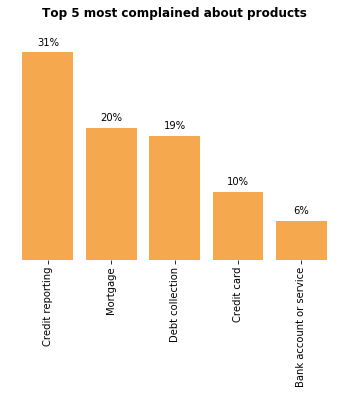

In [32]:
"""Instructions for visualization"""

prod_greater_5 = products[products['perc_total'] > 0.05]
prod_less_5 = products[products['perc_total'] < 0.05]
prod_greater_5_type = prod_greater_5.index.values

fig, ax = plt.subplots()
ax.bar(prod_greater_5_type, prod_greater_5['perc_total'], color=[246/255, 168/255, 78/255])

ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


# Function definition from: https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}%".format(y_value*100)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

# Turn off tick labels
# Source: https://stackoverflow.com/questions/37039685/hide-axis-values-in-matplotlib
ax.set_yticklabels([])


plt.yticks([])

plt.title('Top 5 most complained about products', fontweight = 'bold', ha = 'center', pad = 25)
plt.xticks(rotation = 90)


plt.show()

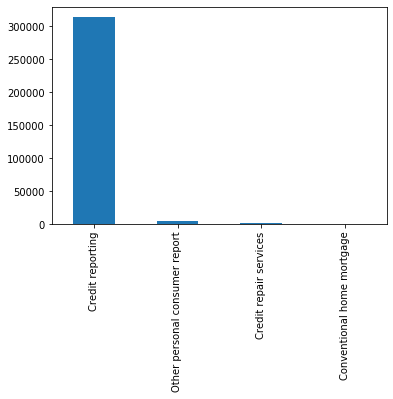

In [33]:
credit_rep_subproducts.plot(kind='bar')

In [34]:
print( complaints.loc[complaints['product'] == 'Credit reporting', 'issue'].value_counts() )
print('\n')
print( complaints.loc[complaints['product'] == 'Credit reporting', 'sub_issue'].value_counts() )
print('\n')
print( complaints.loc[complaints['product'] == 'Mortgage', 'issue'].value_counts() )
print('\n')
print( complaints.loc[complaints['product'] == 'Debt collection', 'issue'].value_counts() )
print('\n')
print( complaints.loc[complaints['product'] == 'Credit card', 'issue'].value_counts() )
print('\n')
print( complaints.loc[complaints['product'] == 'Bank account or service', 'issue'].value_counts() )


Incorrect information on your report                                                190027
Incorrect information on credit report                                              102686
Problem with a credit reporting company's investigation into an existing problem     70390
Improper use of your report                                                          40244
Credit reporting company's investigation                                             16883
Unable to get credit report/credit score                                             10859
Unable to get your credit report or credit score                                      6916
Problem with fraud alerts or security freezes                                         6712
Improper use of my credit report                                                      5580
Credit monitoring or identity protection                                              4424
Credit monitoring or identity theft protection services                               3386

Cont'd attempts collect debt not owed                            60682
Attempts to collect debt not owed                                57752
Communication tactics                                            38467
Disclosure verification of debt                                  30797
Written notification about debt                                  29614
False statements or representation                               22818
Took or threatened to take negative or legal action              12160
Improper contact or sharing of info                              10068
Taking/threatening an illegal action                              8860
Threatened to contact someone or share information improperly     3441
Name: issue, dtype: int64


Problem with a purchase shown on your statement                                     15603
Billing disputes                                                                    15136
Other                                                                             

In [35]:
# Investigate largest issues & sub_issues in credit reporting
print( complaints.loc[complaints['sub_issue'] == 'Information belongs to someone else', 'issue'].value_counts() )
print('\n')
print( complaints.loc[complaints['sub_issue'] == 'Information belongs to someone else', 'product'].value_counts() )
print('\n')
print( complaints.loc[complaints['issue'] == 'Incorrect information on your report', 'sub_issue'].value_counts() )
print('\n')
print( complaints.loc[complaints['issue'] == 'Incorrect information on credit report', 'sub_issue'].value_counts() )


Incorrect information on your report    99214
Name: issue, dtype: int64


Credit reporting               98313
Credit card                      456
Vehicle loan or lease            124
Student loan                     102
Checking or savings account       93
Consumer loan                     84
Payday loan                       42
Name: product, dtype: int64


Information belongs to someone else                    99214
Account status incorrect                               34411
Account information incorrect                          31034
Personal information incorrect                          9710
Public record information inaccurate                    8291
Old information reappears or never goes away            8244
Information is missing that should be on the report     3932
Information is incorrect                                 611
Information that should be on the report is missing      101
Incorrect information on your report                       1
Name: sub_issue, dtype: int

# Conclusions and observations:

* Consumers complain the most about companies that they do not have a choice in patroning; that is, credit reporting companies.
* The single largest issue consumers report to the CFPB is incorrect data on their credit report. Yet even when credit reporting companies make these types of errors, consumers do not have the option to opt out.
* The lack of consumer choice is opting in or out of their data being collected by credit reporting companies likely plays in a role in why they are the most complained about company type in America.

Possible Next steps:
* Basemap to display state with most complaints? What types of companies are most complained about by state?

Basemap sources:
* Tutorial with zip codes: http://www.jtrive.com/visualizing-population-density-by-zip-code-with-basemap.html
* https://basemaptutorial.readthedocs.io/en/latest/
* https://readthedocs.org/projects/basemaptutorial/downloads/pdf/latest/
* https://rabernat.github.io/research_computing/intro-to-basemap.html
* https://geoexamples.com/python/2014/11/26/basemap-tutorial.html

